<a href="https://colab.research.google.com/github/Saniya843/Graph-Convolutional-Neural-Network/blob/main/GCNN_74.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
from skimage.feature import greycomatrix, greycoprops
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.4 MB/s eta 0:00:00


In [ ]:
import os
import csv

# Path to the folder containing the train images on Google Drive
train_folder_path = '/content/drive/MyDrive/chest_xray/train'

# Path to the folder containing the test images on Google Drive
test_folder_path = '/content/drive/MyDrive/chest_xray/test'

# Initialize the data list
data = [['path', 'labels']]

# Traverse the files in the train folder and its subfolders
for root, dirs, files in os.walk(train_folder_path):
    for file in files:
        # Full file path
        file_path = os.path.join(root, file)
        # Relative file path to the base folder
        relative_path = os.path.abspath(file_path)
        relative_path2 = os.path.relpath(file_path, train_folder_path)
        # Split the relative path to extract the subfolder name
        subfolder_name = os.path.dirname(relative_path2)
        # Add the relative path and the subfolder name to the data list
        data.append([relative_path, subfolder_name])

# Traverse the files in the test folder and its subfolders
for root, dirs, files in os.walk(test_folder_path):
    for file in files:
        # Full file path
        file_path = os.path.join(root, file)
        # Relative file path to the base folder
        relative_path = os.path.abspath(file_path)
        relative_path2 = os.path.relpath(file_path, test_folder_path)
        # Split the relative path to extract the subfolder name
        subfolder_name = os.path.dirname(relative_path2)
        # Add the relative path and the subfolder name to the data list
        data.append([relative_path, subfolder_name])

# Display the first five lines of the data list
for row in data[:5]:
    print(row)


# Specify the CSV file path for the test dataset
dataset_csv_file = '/content/drive/MyDrive/chest_xray/dataset.csv'

# Write data to the CSV file for the train dataset
with open(dataset_csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)


['path', 'labels']
['/content/drive/MyDrive/chest_xray/train/NORMAL/result908.png', 'NORMAL']
['/content/drive/MyDrive/chest_xray/train/NORMAL/result1343.png', 'NORMAL']
['/content/drive/MyDrive/chest_xray/train/NORMAL/result377.png', 'NORMAL']
['/content/drive/MyDrive/chest_xray/train/NORMAL/result1274.png', 'NORMAL']


In [ ]:
!git clone https://github.com/rusty1s/pytorch_geometric.git


fatal: destination path 'pytorch_geometric' already exists and is not an empty directory.


In [ ]:
!pip install torch-geometric

In [ ]:
import pandas as pd
import numpy as np
import cv2
from skimage.feature import greycomatrix, greycoprops

# Load the dataset from CSV
dataset = pd.read_csv('/content/drive/MyDrive/chest_xray/dataset.csv')
dataset = dataset.sample(frac=1).reset_index(drop=True)

# Create empty lists to store features, labels, and image IDs
features = []
labels = []
image_ids = []

# Iterate over the dataset rows and extract features, labels, and image IDs
for index, row in dataset.iterrows():
    image_path = row['path']
    label = row['labels']

    # Perform preprocessing and feature extraction on the image
    def extract_features(image_path):
        # Load the image in grayscale
        gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Check if the image was loaded successfully
        if gray_image is None:
            print("Impossible de charger l'image :", image_path)
            return None

        # Perform feature extraction using gray-level co-occurrence matrix (GLCM)
        distances = [1]  # List of distances for GLCM calculation
        angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # List of angles for GLCM calculation
        glcm = greycomatrix(gray_image, distances, angles)

            # Calculate GLCM properties
        contrast = greycoprops(glcm, 'contrast').flatten().astype(float)
        dissimilarity = greycoprops(glcm, 'dissimilarity').flatten().astype(float)
        energy = greycoprops(glcm, 'energy').flatten().astype(float)
        correlation = greycoprops(glcm, 'correlation').flatten().astype(float)

        # Return the features as a list
        return list(contrast) + list(dissimilarity) + list(energy) + list(correlation)
    extracted_features = extract_features(image_path)

    # Append the extracted features, label, and image ID to the respective lists
    if extracted_features is not None:
        features.append(extracted_features)
        labels.append(label)
        image_ids.append(index)  # Use the row index as image ID


# Create a new DataFrame containing features, labels, and image IDs
dataset_features = pd.DataFrame({'ID': image_ids, 'Features': features, 'Labels': labels})

# Print the head of the processed dataset
print(dataset_features.head())

# Save the processed dataset to CSV
dataset_features.to_csv('/content/drive/MyDrive/chest_xray/test_dataset.csv', index=False)


# Save the arrays as .npy files in your Google Drive
np.save('/content/drive/MyDrive/chest_xray/features.npy', features)
np.save('/content/drive/MyDrive/chest_xray/labels.npy', labels)
np.save('/content/drive/MyDrive/chest_xray/image_ids.npy', image_ids)




Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` in

Impossible de charger l'image : /content/drive/MyDrive/chest_xray/train/PNEUMONIA/.DS_Store


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` in

Impossible de charger l'image : /content/drive/MyDrive/chest_xray/test/.DS_Store


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` in

   ID                                           Features     Labels
0   0  [20.600866551705817, 37.71530987153172, 27.694...  PNEUMONIA
1   1  [27.67763638201568, 39.87925578258094, 26.9422...     NORMAL
2   2  [26.270754067584946, 33.515267050020114, 20.32...     NORMAL
3   3  [54.632814468080056, 92.05666447497266, 58.022...  PNEUMONIA
4   4  [20.637169079511075, 35.98519226014449, 25.944...  PNEUMONIA


In [ ]:
import numpy as np
dataset_features = pd.read_csv('/content/drive/MyDrive/chest_xray/test_dataset.csv')
# Load the arrays from .npy files
features = np.load('/content/drive/MyDrive/chest_xray/features.npy')
labels = np.load('/content/drive/MyDrive/chest_xray/labels.npy')
image_ids = np.load('/content/drive/MyDrive/chest_xray/image_ids.npy')

#### 6.3 Implementation of Graph Convolutional Networks

##### 6.3.1 Loading and Parsing the Dataset


In [ ]:
X=features
X.shape

(8396, 16)

In [ ]:
# Create a subset of data containing only the IDs and labels "NORMAL"
normal_subset = dataset_features[dataset_features['Labels'] == 'NORMAL'][['ID', 'Labels']]

# Create a subset of data containing only the IDs and labels "PNEUMONIA"
pneumonia_subset = dataset_features[dataset_features['Labels'] == 'PNEUMONIA'][['ID', 'Labels']]

# Display the first few rows of the subsets for verification
print("NORMAL subset of data:")
print(normal_subset.head())

print("\nPNEUMONIA subset of data:")
print(pneumonia_subset.head())


NORMAL subset of data:
   ID  Labels
1   1  NORMAL
2   2  NORMAL
5   5  NORMAL
6   6  NORMAL
7   7  NORMAL

PNEUMONIA subset of data:
    ID     Labels
0    0  PNEUMONIA
3    3  PNEUMONIA
4    4  PNEUMONIA
9    9  PNEUMONIA
10  10  PNEUMONIA


In [ ]:
from itertools import combinations

# Get the IDs of pneumonia cases
pneumonia_ids = pneumonia_subset['ID'].tolist()
# Get the IDs of "NORMAL" cases
normal_ids = normal_subset['ID'].tolist()

# Generate all distinct combinations of IDs
id_combinations = list(combinations(pneumonia_ids, 2))  # You can adjust the number of elements in each combination if needed

# Generate all distinct combinations of IDs for "NORMAL" cases
normal_id_combinations = list(combinations(normal_ids, 2))

# Combine the ID combinations of "NORMAL" cases and pneumonia cases
edge_list = id_combinations + normal_id_combinations

print(len(edge_list))


17625406


In [ ]:
# Convert the columns to numpy arrays
nodes = dataset_features['ID'].values
labels = dataset_features['Labels'].values
N = X.shape[0]  # the number of nodes
F = X.shape[1]  # the size of node features

print('\nNumber of nodes (N): ', len(nodes))
print('\nShape of the extracted features: ', X.shape)
print('\nCategories: ', set(labels))

num_classes = len(set(labels))
print('\nNumber of classes: ', num_classes)



Number of nodes (N):  8396

Shape of the extracted features:  (8396, 16)

Categories:  {'NORMAL', 'PNEUMONIA'}

Number of classes:  2


we picked 70 percent for the Training,

In [ ]:
def limit_data(labels,limit=3146,val_num=1049,test_num=1050):
    '''
    Get the index of train, validation, and test data
    '''
    label_counter = dict((l, 0) for l in labels)
    train_idx = []

    for i in range(len(labels)):
        label = labels[i]
        if label_counter[label]<limit:
            #add the example to the training data
            train_idx.append(i)
            label_counter[label]+=1

        #exit the loop once we found 20 examples for each class
        if all(count == limit for count in label_counter.values()):
            break

    #get the indices that do not go to traning data
    rest_idx = [x for x in range(len(labels)) if x not in train_idx]
    val_idx = rest_idx[:val_num]
    test_idx = rest_idx[val_num:(val_num+test_num)]
    return train_idx, val_idx,test_idx

train_idx,val_idx,test_idx = limit_data(labels)

#set the mask
train_mask = np.zeros((N,),dtype=bool)
train_mask[train_idx] = True

val_mask = np.zeros((N,),dtype=bool)
val_mask[val_idx] = True

test_mask = np.zeros((N,),dtype=bool)
test_mask[test_idx] = True

##### 6.3.3 Obtaining the Adjacency Matrix
The next step is to obtain the Adjacency Matrix (A) of the graph.

We use NetworkX to help us do this.

We will initialize a graph and then add the nodes and edges lists to the graph.

In [ ]:
!pip install networkx --upgrade

In [ ]:
import networkx as nx
#build the graph
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edge_list)


#obtain the adjacency matrix (A)
A = nx.adjacency_matrix(G)

##### 6.3.4 Converting the label to one-hot encoding
The last step before building our GCN is, just like any other machine learning model, encoding the labels and then converting them to one-hot encoding.

In [ ]:
from sklearn import preprocessing
from keras.utils import to_categorical
def encode_label(labels):
    label_encoder = preprocessing.LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    labels = to_categorical(labels)
    return labels, label_encoder.classes_

labels_encoded, classes = encode_label(labels)

We are now done with data preprocessing and ready to build our GCN!

##### 6.3.5 Build the Graph Convolutional Networks
The GCN model architectures and hyperparameters follow the design from GCN original paper.

The GCN model will take 2 inputs:
1. the Node Features Matrix (X)
2. Adjacency Matrix (A).

The GCN model architectures and hyperparameters follow the design from the original GCN paper.

The GCN model takes two inputs: the Node Features Matrix (X) and the Adjacency Matrix (A).

We implement a 5-layer GCN with Dropout layers and L2 regularization.

To prevent overfitting, we set the dropout rate to 0.5 and the L2 regularization rate to 5e-4.

Training is carried out using the Adam optimizer with a learning rate of 1e-3.

We limit the maximum number of training epochs to 50 and employ Early Stopping with a patience of 100 epochs, meaning training will halt if the validation loss does not decrease for 100 consecutive epochs.

To monitor the training progress and visualize metrics such as accuracy and loss, we utilize TensorBoard callbacks.

Before feeding the Adjacency Matrix (A) into the GCN, we preprocess it using the renormalization trick as outlined in the original paper.


In [ ]:
pip install spektral

In [ ]:
from spektral.layers import GCNConv
from keras.layers import Input,Dropout
from tensorflow.keras import regularizers
from keras import Model
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import Reshape
import os

channels = 128           # Number of channels in the first layer
dropout = 0.5           # Dropout rate for the features
l2_reg = 5e-4           # L2 regularization rate
learning_rate = 1e-3    # Learning rate
epochs = 50            # Number of training epochs
es_patience = 100        # Patience for early stopping

# Preprocessing operations
A = GCNConv.preprocess(A).astype('f4')

N = X.shape[0] #the number of nodes
F = X.shape[1] #the size of node features

# Model definition
X_in = Input(shape=(F,))
fltr_in = Input((N,), sparse=True)

dropout_1 = Dropout(dropout)(X_in)
graph_conv_1 = GCNConv(channels,
                       activation='relu',
                       kernel_regularizer=regularizers.l2(l2_reg),
                       use_bias=False)([dropout_1, fltr_in])

dropout_2 = Dropout(dropout)(graph_conv_1)
graph_conv_2 = GCNConv(64,
                       activation='relu',
                       kernel_regularizer=regularizers.l2(l2_reg),
                       use_bias=False)([dropout_2, fltr_in])

dropout_3 = Dropout(dropout)(graph_conv_2)
graph_conv_3 = GCNConv(32,
                       activation='relu',
                       kernel_regularizer=regularizers.l2(l2_reg),
                       use_bias=False)([dropout_3, fltr_in])

dropout_4 = Dropout(dropout)(graph_conv_3)
graph_conv_4 = GCNConv(16,
                       activation='relu',
                       kernel_regularizer=regularizers.l2(l2_reg),
                       use_bias=False)([dropout_4, fltr_in])

dropout_5 = Dropout(dropout)(graph_conv_4)
graph_conv_5 = GCNConv(num_classes,
                       activation='softmax',
                       use_bias=False)([dropout_5, fltr_in])

# Build model
model = Model(inputs=[X_in, fltr_in], outputs=graph_conv_5)
optimizer = Adam(lr=learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              weighted_metrics=['acc'])
model.summary()

# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "/content/drive/MyDrive/chest_xray/train/trainingsavingcp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Calculate the total number of batches per epoch
total_batches = math.ceil(N / batch_size)

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5 * total_batches)  # Save every 5 epochs



Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 16)]                 0         []                            
                                                                                                  
 dropout_20 (Dropout)        (None, 16)                   0         ['input_9[0][0]']             
                                                                                                  
 input_10 (InputLayer)       [(None, 8396)]               0         []                            
                                                                                                  
 gcn_conv_20 (GCNConv)       (None, 128)                  2048      ['dropout_20[0][0]',          
                                                                     'input_10[0][0]']      

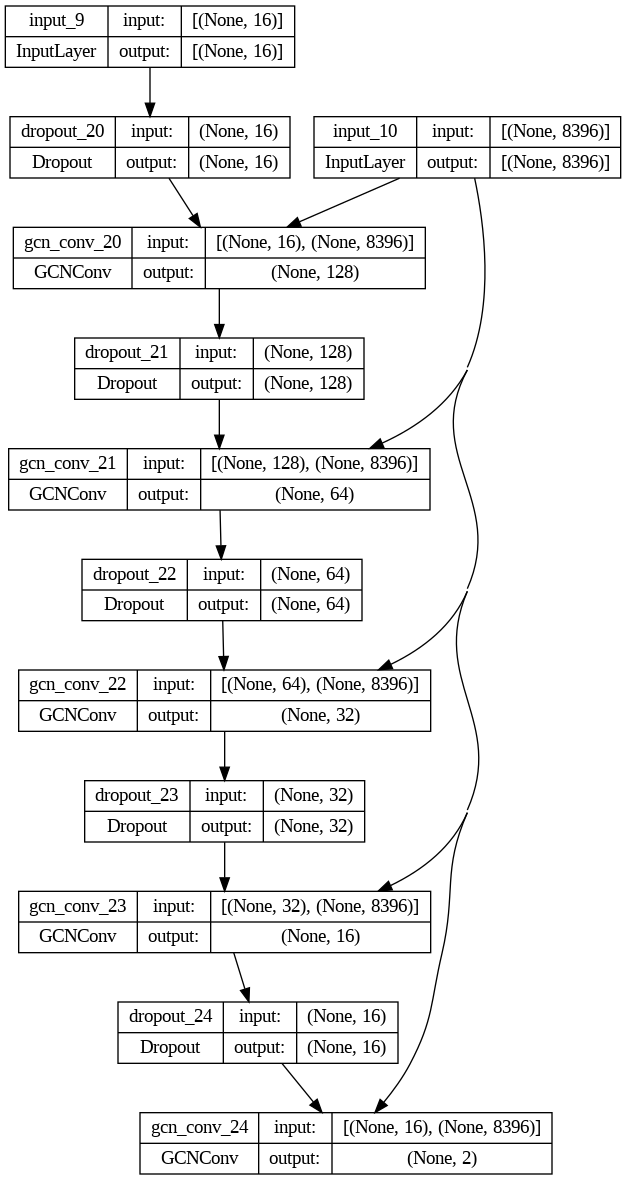

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualize and save the model architecture
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


##### Train the Graph Convolutional Networks



In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define validation data
validation_data = ([X, A], labels_encoded, val_mask)

# Define the path where you want to save the model
model_checkpoint_path = '/content/drive/MyDrive/chest_xray/model.h5'

# Define the ModelCheckpoint callback to save the entire model
model_checkpoint_callback = ModelCheckpoint(
    filepath=model_checkpoint_path,
    monitor='val_loss',      # Monitor validation loss to save the best model
    save_best_only=True,     # Save only the best model
    verbose=1                # Show progress
)

# Train model with callbacks
history = model.fit(
    [X, A],
    labels_encoded,
    sample_weight=train_mask,
    epochs=epochs,
    batch_size=N,
    validation_data=validation_data,
    shuffle=False,
    callbacks=[
        EarlyStopping(patience=es_patience, restore_best_weights=True),
        model_checkpoint_callback  # Add ModelCheckpoint callback
    ]
)


Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 0.5488 - acc: 0.6383
Epoch 1: val_loss improved from inf to 0.15604, saving model to /content/drive/MyDrive/chest_xray/model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 14s 14s/step - loss: 0.5488 - acc: 0.6383 - val_loss: 0.1560 - val_acc: 0.9895
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 0.5408 - acc: 0.6920
Epoch 2: val_loss improved from 0.15604 to 0.15591, saving model to /content/drive/MyDrive/chest_xray/model.h5
1/1 [==============================] - 18s 18s/step - loss: 0.5408 - acc: 0.6920 - val_loss: 0.1559 - val_acc: 0.9886
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 0.5651 - acc: 0.6494
Epoch 3: val_loss improved from 0.15591 to 0.15570, saving model to /content/drive/MyDrive/chest_xray/model.h5
1/1 [==============================] - 11s 11s/step - loss: 0.5651 - acc: 0.6494 - val_loss: 0.1557 - val_acc: 0.8513
Epoch 4/50
1/1 [==============================] - ETA: 0s - loss: 0.5072 - acc: 0.7403
Epoch 4: val_loss did not improve from 0.15570
1/1 [==============================] - 10s 10s/step - loss: 0.5072 - acc: 0.7403 - val_loss: 0.1558 - val_acc: 0.432

<Axes: >

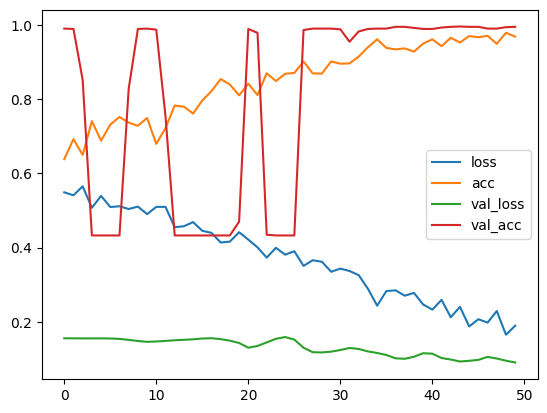

In [ ]:
history_df=pd.DataFrame(history.history)
history_df.plot()

In [ ]:
y = labels_encoded

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, mean_absolute_error
import numpy as np

# Get predictions from the model
y_pred = model.predict([X, A], batch_size=N)

# Calculate metrics
accuracy = accuracy_score(np.argmax(y, axis=1), np.argmax(y_pred, axis=1))
report = classification_report(np.argmax(y, axis=1), np.argmax(y_pred, axis=1), target_names=classes)
mse = mean_squared_error(np.argmax(y, axis=1), np.argmax(y_pred, axis=1))
mae = mean_absolute_error(np.argmax(y, axis=1), np.argmax(y_pred, axis=1))

# Obtain the learning rate from the optimizer
learning_rate = model.optimizer.learning_rate.numpy()

# Print the metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Mean Squared Error (MSE): {:.4f}".format(mse))
print("Mean Absolute Error (MAE): {:.4f}".format(mae))
print("Learning Rate: {:.6f}".format(learning_rate))
print("Classification Report:\n", report)

1/1 [==============================] - 7s 7s/step
Accuracy: 99.68%
Mean Squared Error (MSE): 0.0032
Mean Absolute Error (MAE): 0.0032
Learning Rate: 0.001000
Classification Report:
               precision    recall  f1-score   support

      NORMAL       0.99      1.00      1.00      4118
   PNEUMONIA       1.00      0.99      1.00      4278

    accuracy                           1.00      8396
   macro avg       1.00      1.00      1.00      8396
weighted avg       1.00      1.00      1.00      8396



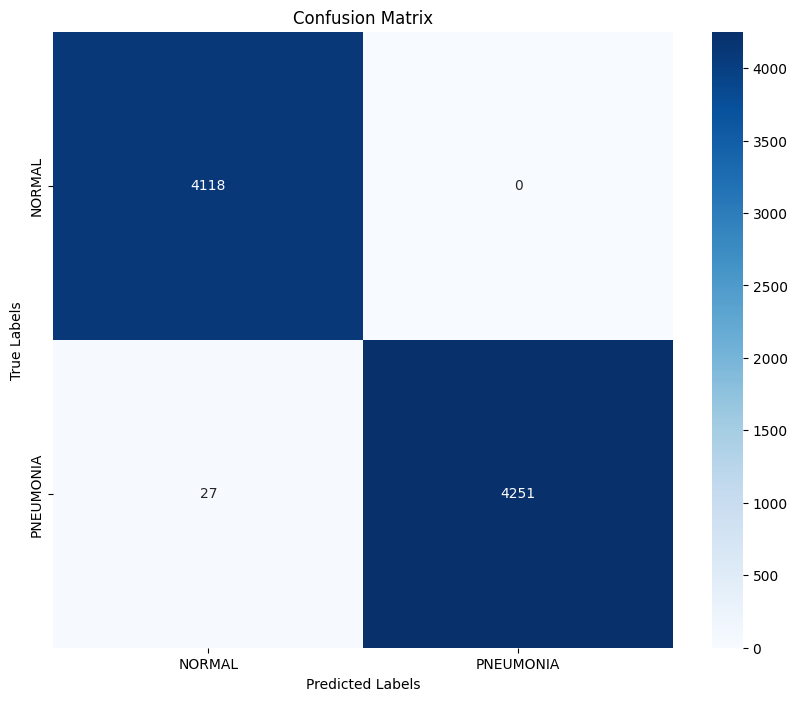

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(np.argmax(y, axis=1), np.argmax(y_pred, axis=1))

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


1/1 [==============================] - 7s 7s/step


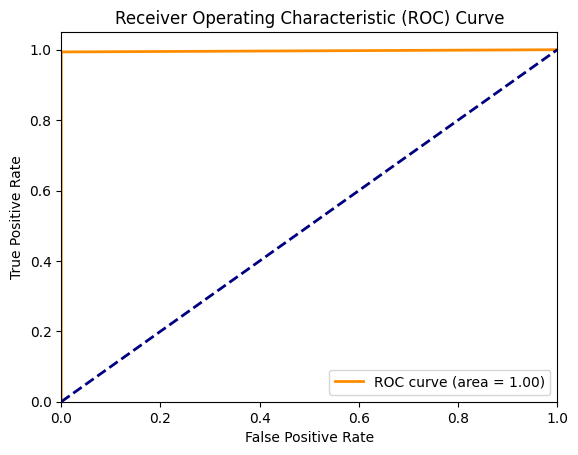

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predictions from the model
y_pred = model.predict([X, A], batch_size=N)

# Convert probabilities to binary labels
y_pred_binary = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to binary labels
y_true_binary = np.argmax(y, axis=1)       # Convert true labels to binary labels

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_true_binary, y_pred_binary)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
